In [1]:
import pandas as pd
import numpy as np
import time

df = pd.read_csv('../data/FertilizersProduct.csv')
df.head()

final_times = dict()
iterations = 50
store_time = np.empty(shape=iterations, dtype='float64')
time_std = np.empty(shape=6, dtype='float64')

#Purpose: to get a dataframe that will create a proportional stacked bar chart by fertilizer type

#Use vectorization/Cython/list comp. to get format of dataframe
#Use apply/iterrtuples/iterrows for final format

In [2]:
#Vectorization - uses built in math ops or converting between wide/long or use groupby/filter/transform...
#Does not work well with incomplete datasets (with nan)



#Convert long to wide using pivot/stack or wide to long using melt/unstack

#Pivot uses index (new index), columns (new columns), values (new values)
#Stack uses level (levels in int/str/list), fillna (drop nan of result)
#Pivot_table is like pivot but with a built in aggfunc

#Melt uses id_vars (identifier column), value_vars (melting column), value_name (name of new melting column), col_name (if already has different levels)


for i in range(iterations):
    dfpivot = df.copy(deep=False)

    start = time.time()

    dfpivot = dfpivot[dfpivot['Unit']=='tonnes'].drop(columns=['Unit'])
    dfpivot = dfpivot.groupby(['Area','Item'], as_index=False)['Value'].sum()
    dfpivot = dfpivot.pivot(index='Area', columns='Item', values='Value')

    dfpivot = dfpivot.fillna(0.0)

    store_time[i] = time.time()-start

print("Vectorization took: ",np.mean(store_time)," seconds")

final_times['vect'] = np.mean(store_time)
time_std[0] = np.std(store_time)

dfpivot.head()

Vectorization took:  0.11567780494689942  seconds


Item,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [14]:
#Apply - works on column/row
#Applymap - works elementwise across many rows/columns
#Map - works elementwise by series only

#Apply


for i in range(iterations):
    dfapply = df.copy(deep=False)

    start = time.time()


    dfapply = dfapply[['Area','Item','Unit','Value']]
    dfapply = dfapply[dfapply['Unit'].apply(lambda x: x=='tonnes')]
    dfapply.drop(columns=['Unit'], inplace=True)
    dfapply = dfapply.groupby(['Area','Item'], as_index=False)['Value'].sum()
    dfapply = dfapply.pivot(index='Area', columns='Item', values='Value')
    dfapply = dfapply.fillna(0.0)

    store_time[i] = time.time()-start


print('Apply took ', np.mean(store_time),' seconds')

final_times['apply'] = np.mean(store_time)
time_std[1] = np.std(store_time)

dfapply.head()


Apply took  0.15565869331359863  seconds


Item,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [15]:
#Import pyx file and call its methods using pyxfile.()
#Create/modify setup.py and build in terminal using "python setup.py build_ext --inplace"
import fertilizerprocessor

#Cython - uses C framework (efficient) to implement Python code

for i in range(iterations):
    dfcython = pd.DataFrame(index=np.unique(df['Area']),columns=np.unique(df['Item']))

    start = time.time()

    dataframedict = fertilizerprocessor.fertilizerCount(df['Area'], df['Item'], df['Unit'], df['Value'])


    for k,v in dataframedict.items():
        items = k.split('_')
        dfcython.at[items[0],items[1]] = v

    dfcython = dfcython.fillna(0.0)

    store_time[i] = time.time()-start


print('Cython took: ',np.mean(store_time),' seconds')

final_times['cython'] = np.mean(store_time)
time_std[2] = np.std(store_time)

dfcython.head()


Cython took:  0.11293387413024902  seconds


,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [10]:
#List comprehension - create/manipulate lists in a single line modified for loop

#list = [expression(i) for i in list_object if filter(i)]

for i in range(iterations):
    dflist = pd.DataFrame(index=np.unique(df['Area']),columns=np.unique(df['Item']))

    start = time.time()


    total = dict()
    combined = [list(row) for row in zip(df['Area'],df['Item'],df['Unit'],df['Value']) if row[2]=='tonnes']

    for item in combined:
        item = '_'.join(item[0:3])
        total[item] = 0

    for item in combined:
        key = '_'.join(item[0:3])
        if isinstance(item[3], float):
            total[key] += item[3]

    for k,v in total.items():
        items = k.split('_')
        dflist.at[items[0],items[1]] = v

    dflist = dflist.fillna(0.0)

    store_time[i] = time.time()-start


print('List comprehension took ',np.mean(store_time),' seconds')

final_times['list'] = np.mean(store_time)
time_std[3] = np.std(store_time)

dflist.head()


List comprehension took  0.4543440341949463  seconds


,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


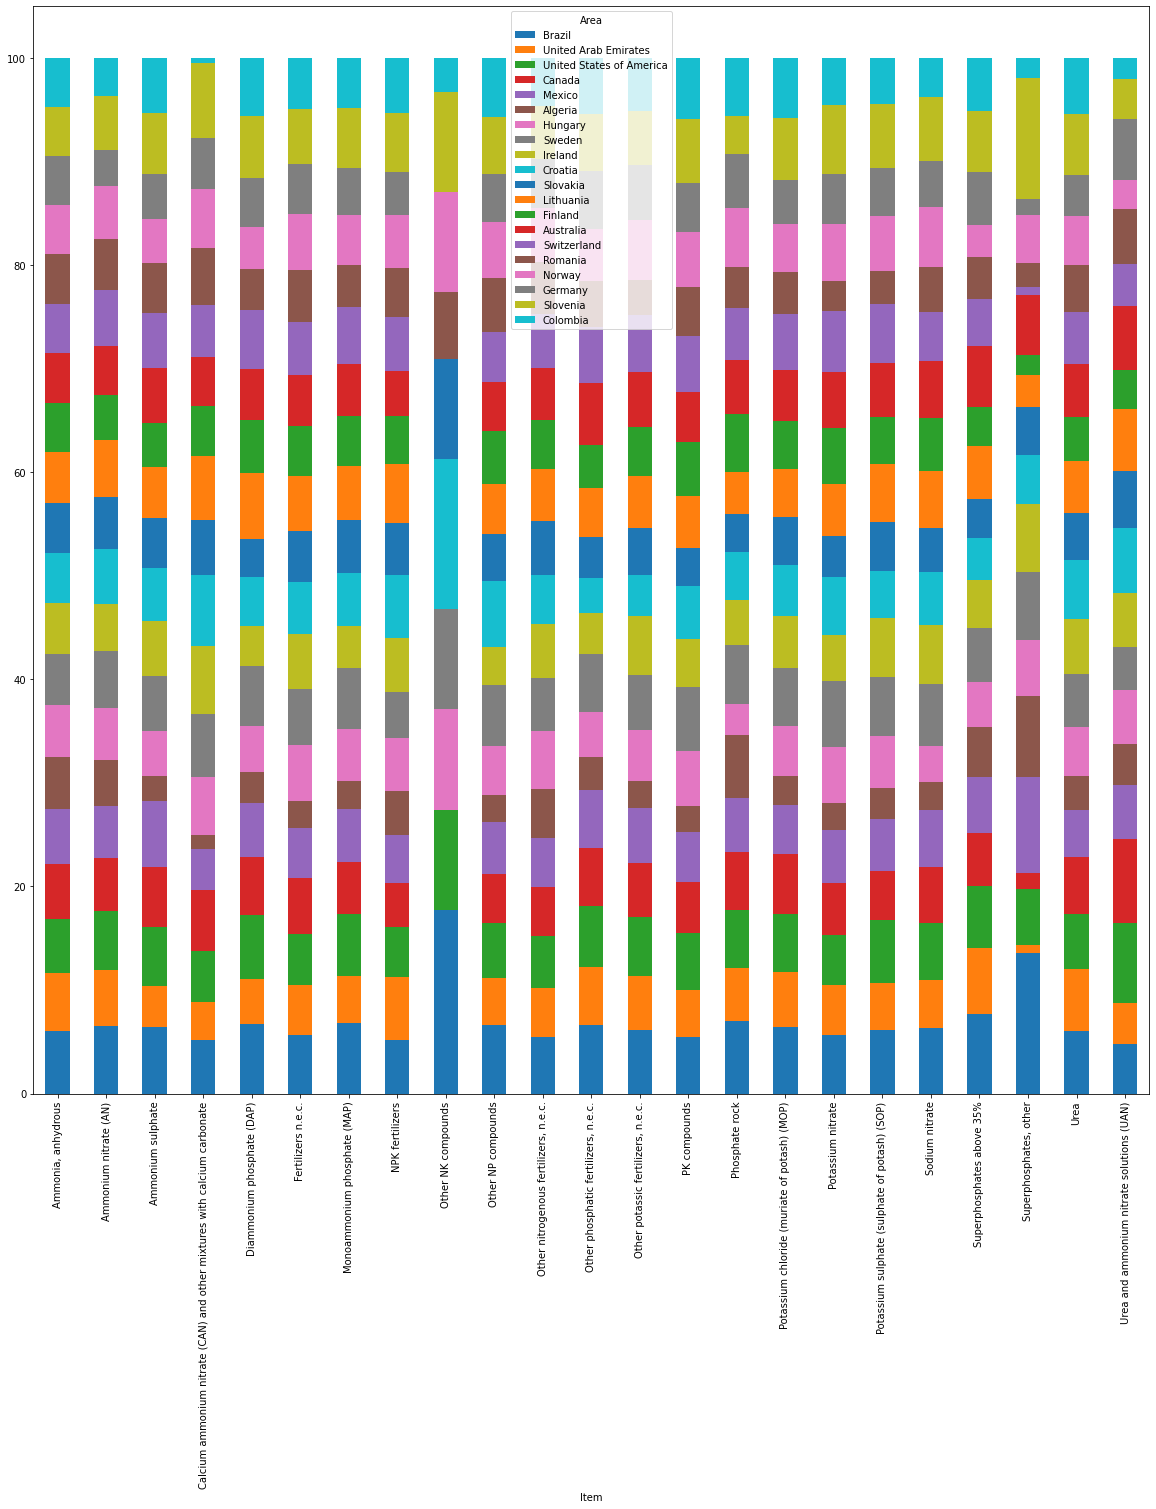

In [105]:
#Itertuples

for i in range(iterations):
    dftuples = pd.DataFrame(index=np.unique(df['Area']), columns=np.unique(df['Item']))

    start = time.time()

    dftuples = dftuples.fillna(0.0)

    for row in df.itertuples(index=False, name='Row'):
        if row.Unit=='tonnes':
             dftuples.at[row.Area, row.Item] += row.Value

    store_time[i] = time.time()-start

print('Itertuples took ',np.mean(store_time),' seconds')

final_times['itertuple'] = np.mean(store_time)
time_std[4] = np.std(store_time)

dftuples.head()

In [ ]:
#Iterrows

for i in range(iterations):
    dfrows = pd.DataFrame(index=np.unique(df['Area']), columns=np.unique(df['Item']))

    start = time.time()

    dfrows = dfrows.fillna(0.0)

    for row in df.itertuples(index=False, name='Row'):
        if row['Unit']=='tonnes':
             dftuples.at[row['Area'], row['Item']] += row['Value']

    store_time[i] = time.time()-start

print('Iterrows took ',np.mean(store_time),' seconds')

final_times['iterrow'] = np.mean(store_time)
time_std[5] = np.std(store_time)

dfrows.head()

In [14]:
dffinal = dfpivot.copy(deep=False)
dffinal.head()

Item,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [15]:
dffinal = dffinal.reindex(dffinal.median().sort_values(ascending=False).index, axis=1)
dffinal = dffinal.T
dffinal = dffinal.reindex(dffinal.median().sort_values(ascending=False).index, axis=1)

dffinal = dffinal.head(10)
dffinal = dffinal.iloc[:,:10]
dffinal = dffinal.T
dffinal.head()

Item,Urea,NPK fertilizers,Ammonium nitrate (AN),Ammonium sulphate,Potassium chloride (muriate of potash) (MOP),"Other nitrogenous fertilizers, n.e.c.",Fertilizers n.e.c.,Diammonium phosphate (DAP),Other NP compounds,Monoammonium phosphate (MAP)
Area,,,,,,,,,,
United States of America,1.772620e+08,7.653178e+07,3.904783e+07,64589402.11,2.169543e+08,9027978.27,3794698.92,1.451715e+08,35681822.93,1.176395e+08
Brazil,1.037788e+08,1.222563e+07,3.558293e+07,53847434.37,1.994394e+08,3290130.55,2876219.20,1.194384e+07,26170408.72,8.431548e+07
Russian Federation,1.336390e+08,9.914655e+07,1.289251e+08,27512869.09,2.260886e+08,1026456.91,1131338.91,3.458852e+07,53168097.41,3.008688e+07
France,2.230109e+07,2.571599e+07,1.896307e+07,6895795.15,1.856838e+07,4290671.97,1520061.98,9.059062e+06,5699185.62,9.997790e+05
"China, mainland",9.094902e+07,2.606369e+08,5.722064e+06,32442764.15,1.119232e+08,12421062.61,5066647.57,6.566472e+07,11402729.85,1.794474e+07


In [16]:
dffinal = dffinal.apply(lambda x: x/x.sum()*100, axis = 1)
dffinal.head()

Item,Urea,NPK fertilizers,Ammonium nitrate (AN),Ammonium sulphate,Potassium chloride (muriate of potash) (MOP),"Other nitrogenous fertilizers, n.e.c.",Fertilizers n.e.c.,Diammonium phosphate (DAP),Other NP compounds,Monoammonium phosphate (MAP)
Area,,,,,,,,,,
United States of America,20.013755,8.640816,4.408693,7.292463,24.495210,1.019303,0.428440,16.390582,4.028654,13.282084
Brazil,19.453528,2.291718,6.670087,10.093802,37.385291,0.616741,0.539153,2.238896,4.905692,15.805093
Russian Federation,18.174424,13.483578,17.533358,3.741652,30.747238,0.139594,0.153858,4.703916,7.230672,4.091709
France,19.560118,22.555294,16.632363,6.048249,16.286183,3.763315,1.333235,7.945634,4.998712,0.876898
"China, mainland",14.808352,42.436993,0.931668,5.282342,18.223370,2.022402,0.824953,10.691553,1.856597,2.921770


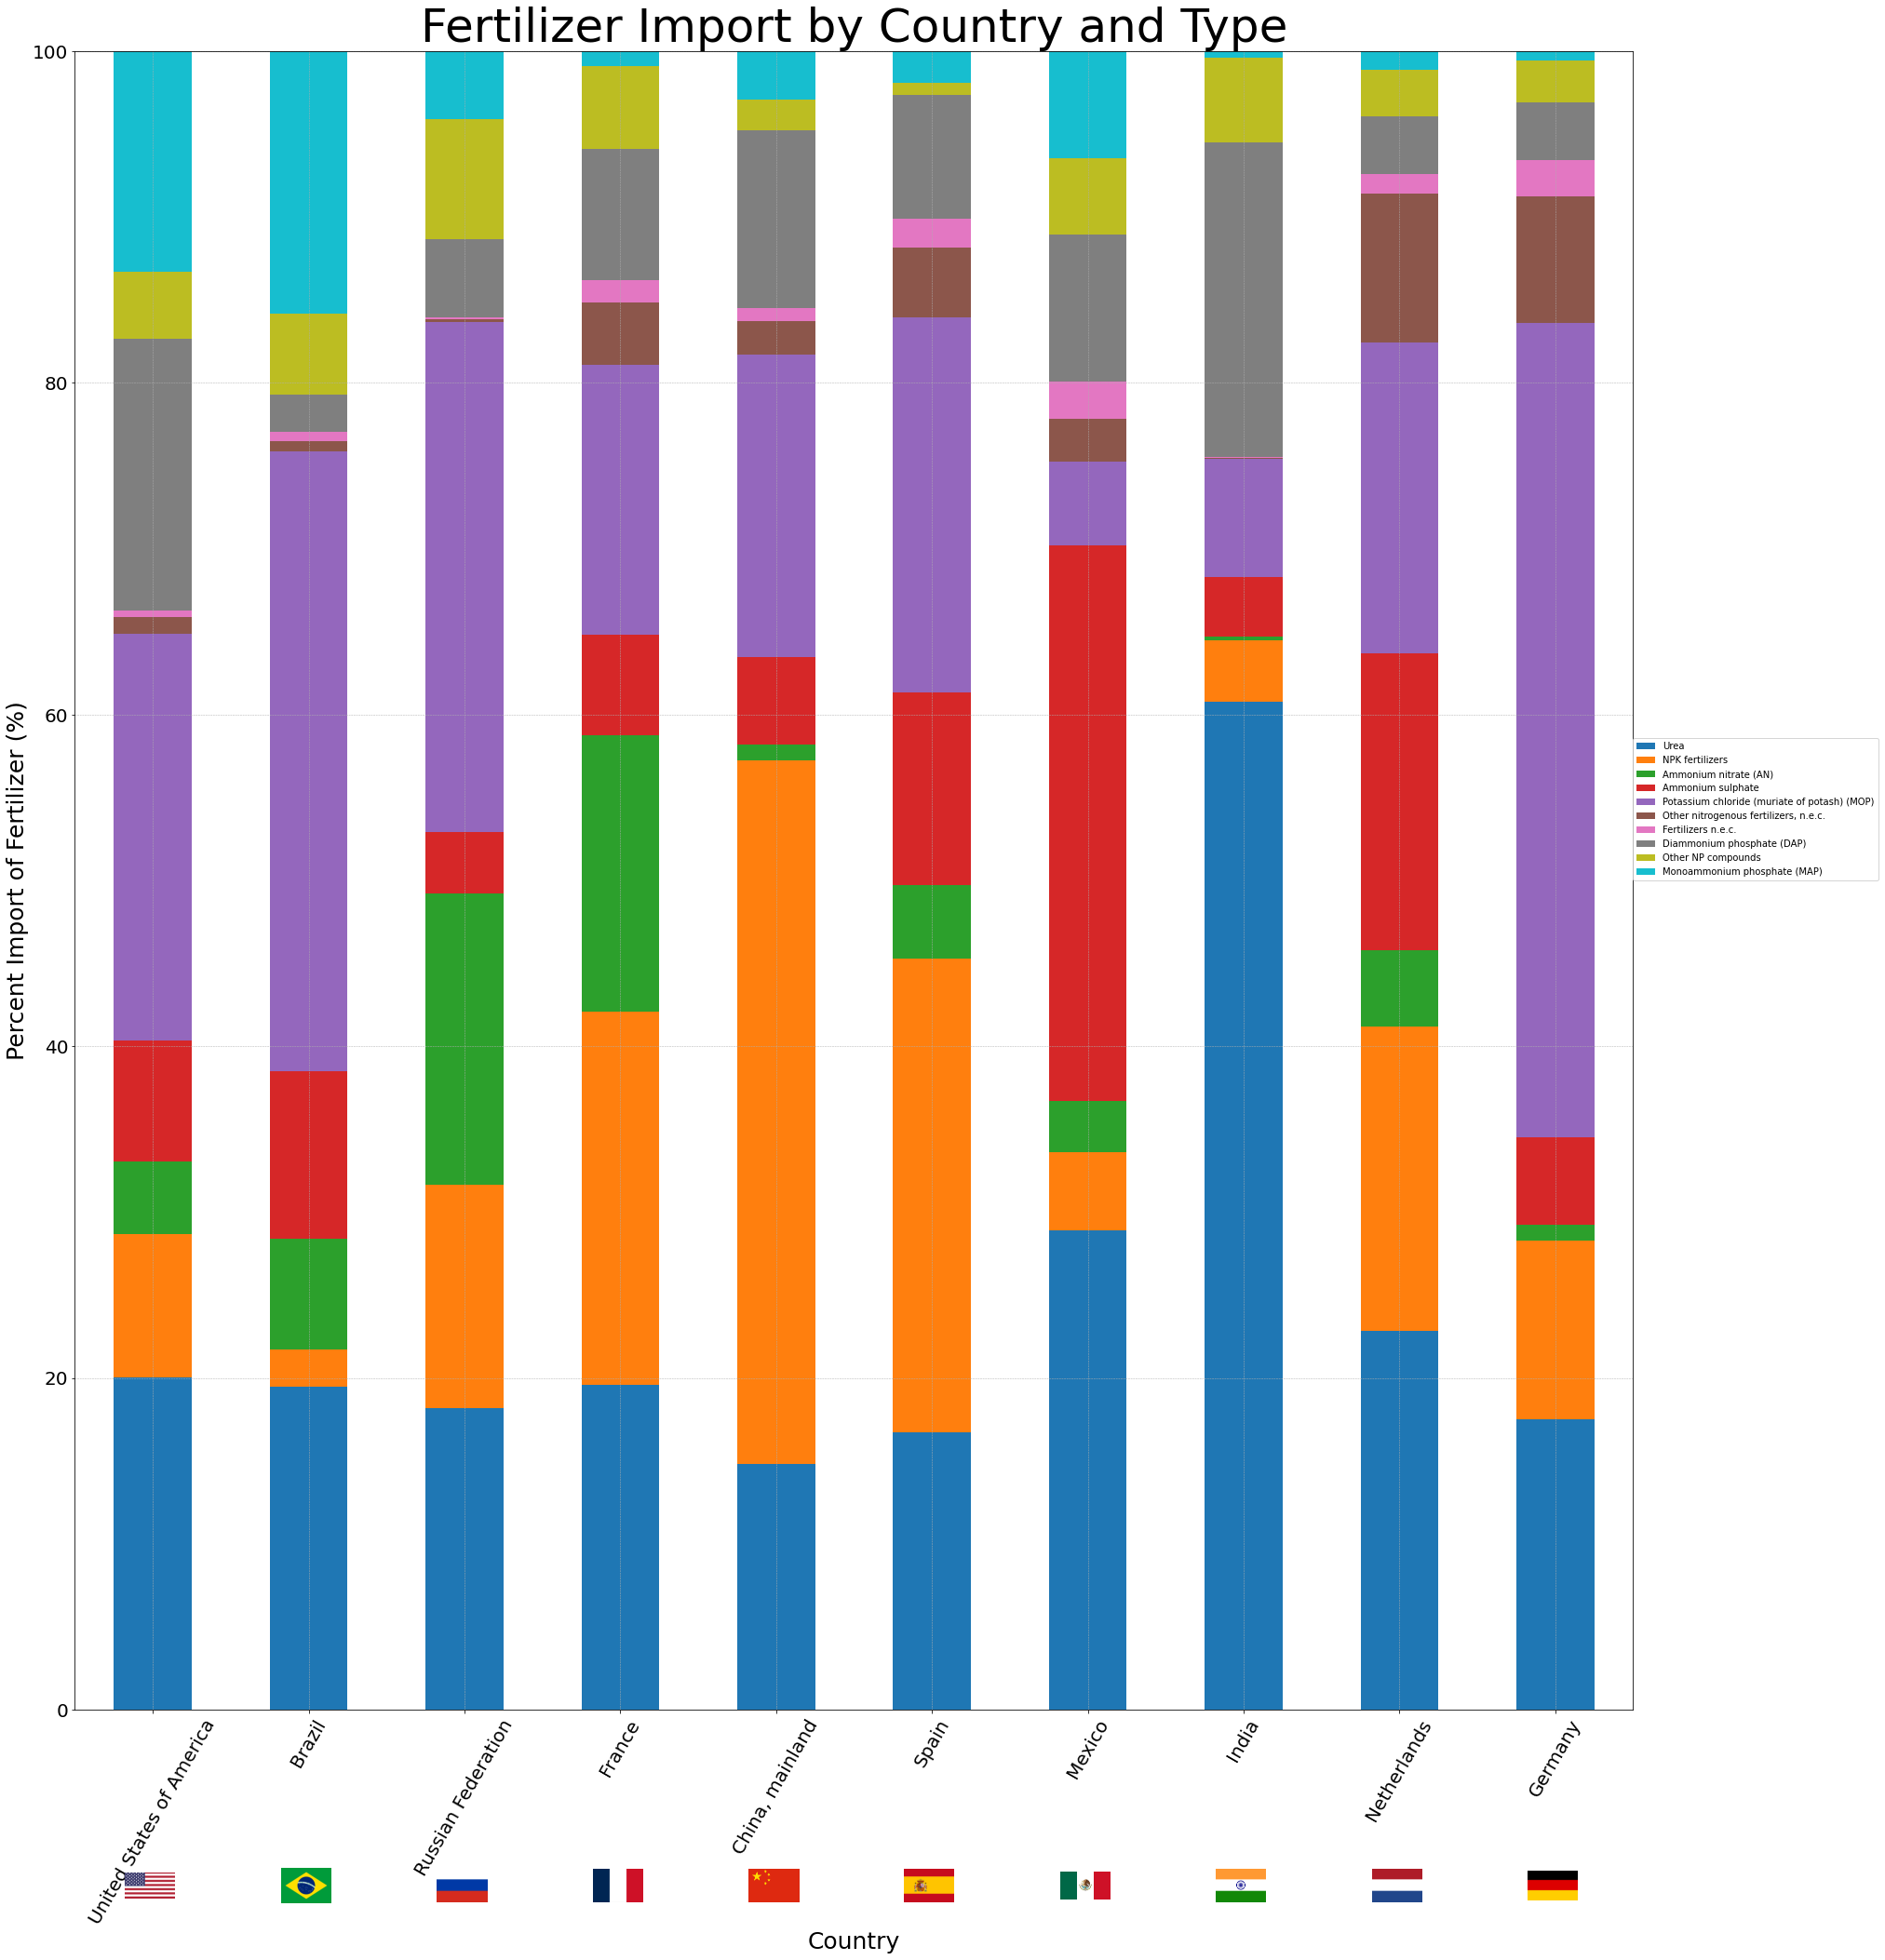

In [72]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111)
ax.set_title('Fertilizer Import by Country and Type', fontsize=50)
dffinal.plot(ax=ax,kind='bar',stacked=True)
ax.set_xlabel('Country', fontsize=25)
ax.set_xticklabels(labels=dffinal.index.values.tolist(), fontsize=20, rotation=60)
ax.set_yticklabels(labels=np.arange(0, 101, 20), fontsize=20)
ax.set_ylabel('Percent Import of Fertilizer (%)', fontsize=25)
ax.grid(True, linestyle='dashed', linewidth=0.5)

plt.subplots_adjust(top=0.95)
plt.ylim([0, 100])
plt.legend(dffinal.columns.to_list(),loc=(1,0.5))
flags = ['USA.png', 'Brazil.png', 'Russia.png', 'France.png', 'China.png', 'Spain.png', 'Mexico.png', 'India.png', 'Netherlands.png', 'Germany.png']

placement = 0.15
for img in flags:
    img = '../data/flags/'+img
    flag_img = mpimg.imread(img)
    imax = fig.add_axes([placement, 0.025, 0.025, 0.025])
    imax.imshow(flag_img)
    imax.axis('off')
    placement+=0.0775

fig.savefig('../output/fertilizerbycountrybarplot.png')
